# An introduction to Biogeme

## Biogeme Basics: Logit Model

In [1]:
import pandas  as pd
import numpy as np
import biogeme.database as db
import biogeme.biogeme as bio
import biogeme.models as models
import biogeme.expressions as exp
import seaborn as sns
import matplotlib.pyplot as plt

**Import Swissmetro data**

In [2]:
pandas = pd.read_csv("../../Data/6-Discrete Choice Models/swissmetro.dat",sep='\t')
database = db.Database("data/swissmetro", pandas)

## Let's see what this dataset has

* dataset consists of survey data collected on the trains between St. Gallen and Geneva, Switzerland, during March 1998
* It is necessary to obtain data from surveys of hypothetical markets/situations, which include the innovation, to assess the impact. 
* Survey data were collected on rail-based travels, interviewing 470 respondents. Due to data problems, only 441 are used here. A similar method for relevant car trips. A total of 1070 persons filled in the survey completely and were willing to participate in the second SP survey, which was generated using the same approach used for the rail interviews. 750 usable SP surveys were returned, from the license-plate based survey.
* Nine stated choice situations were generated for each the respondents, offering three alternatives: rail, Swissmetro and car

Bierlaire, M., Axhausen, K. and Abay, G. (2001), The acceptance of modal innovation: The case of Swissmetro, in ‘Proceedings of the Swiss Transport Research Conference’, Ascona, Switzerland.

![](img/swissmetro_var1.png)

![](img/swissmetro_var2.png)

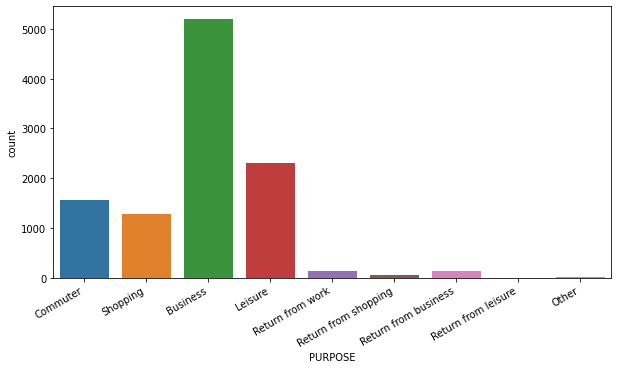

In [3]:
plt.figure(figsize=(10,5))
chart = sns.countplot(pandas['PURPOSE'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');
chart.set_xticklabels(['Commuter', 'Shopping', 'Business', 'Leisure', 'Return from work','Return from shopping', 'Return from business','Return from leisure','Other']);

**Use collumn names as variables**

In [4]:
globals().update(database.variables)

**Exclude some unwanted entries**

In [5]:
exclude = (( PURPOSE != 1 ) * ( PURPOSE != 3 ) + ( CHOICE == 0 )) > 0

database.remove(exclude)

**Define some dummy variables**

In [6]:
SM_COST = SM_CO * ( GA == 0 )
TRAIN_COST = TRAIN_CO * ( GA == 0 )

CAR_AV_SP = exp.DefineVariable ('CAR_AV_SP', CAR_AV * ( SP !=0 ), database)
TRAIN_AV_SP = exp.DefineVariable ('TRAIN_AV_SP', TRAIN_AV * ( SP != 0 ), database)

**Rescale some data**

In [7]:
TRAIN_TT_SCALED   = exp.DefineVariable('TRAIN_TT_SCALED',   TRAIN_TT / 100.0, database)
TRAIN_COST_SCALED = exp.DefineVariable('TRAIN_COST_SCALED', TRAIN_COST / 100, database)
SM_TT_SCALED      = exp.DefineVariable('SM_TT_SCALED',      SM_TT / 100.0   , database)
SM_COST_SCALED    = exp.DefineVariable('SM_COST_SCALED',    SM_COST / 100   , database)
CAR_TT_SCALED     = exp.DefineVariable('CAR_TT_SCALED',     CAR_TT / 100    , database)
CAR_CO_SCALED     = exp.DefineVariable('CAR_CO_SCALED',     CAR_CO / 100    , database)

In [8]:
pandas = database.data

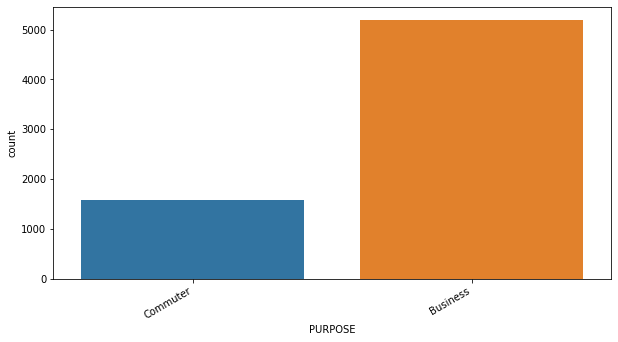

In [9]:
plt.figure(figsize=(10,5))
chart = sns.countplot(pandas['PURPOSE'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');
chart.set_xticklabels(['Commuter', 'Business']);

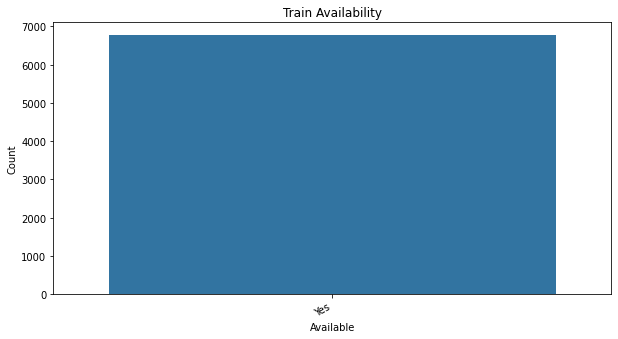

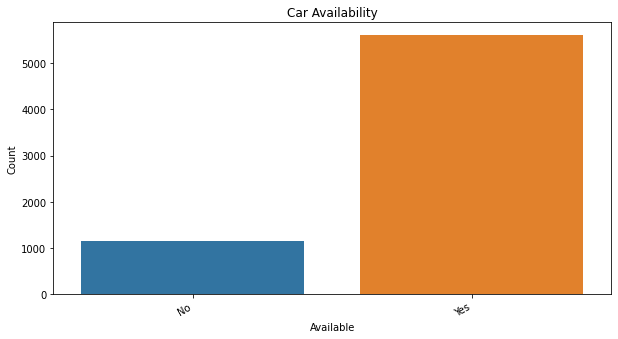

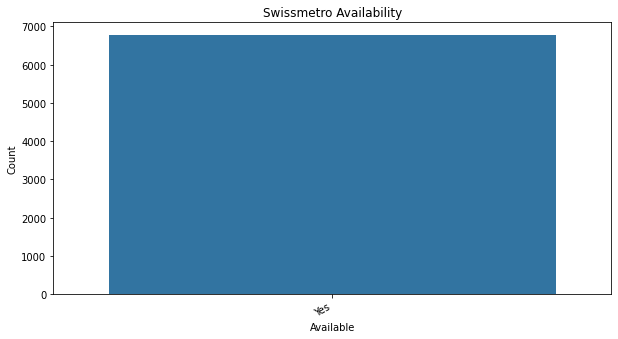

In [10]:
plt.figure(1, figsize=(10,5))
chart = sns.countplot(pandas['TRAIN_AV'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');
chart.set_xticklabels(['Yes']);
chart.set(title='Train Availability', xlabel="Available", ylabel = "Count");

plt.figure(2, figsize=(10,5))
chart = sns.countplot(pandas['CAR_AV'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');
chart.set_xticklabels(['No', 'Yes']);
chart.set(title='Car Availability', xlabel="Available", ylabel = "Count");

plt.figure(3, figsize=(10,5))
chart = sns.countplot(pandas['SM_AV'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');
chart.set_xticklabels(['Yes']);
chart.set(title='Swissmetro Availability', xlabel="Available", ylabel = "Count");

In [11]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

pandas.describe()

,GROUP,SURVEY,SP,ID,PURPOSE,FIRST,TICKET,WHO,LUGGAGE,AGE,MALE,INCOME,GA,ORIGIN,DEST,TRAIN_AV,CAR_AV,SM_AV,TRAIN_TT,TRAIN_CO,TRAIN_HE,SM_TT,SM_CO,SM_HE,SM_SEATS,CAR_TT,CAR_CO,CHOICE,CAR_AV_SP,TRAIN_AV_SP,TRAIN_TT_SCALED,TRAIN_COST_SCALED,SM_TT_SCALED,SM_COST_SCALED,CAR_TT_SCALED,CAR_CO_SCALED
count,6768.00000,6768.00000,6768.0,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000,6768.0,6768.000000,6768.0,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000,6768.0,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000
mean,2.62367,0.62367,1.0,517.174202,2.534574,0.555851,2.739362,1.630319,0.652926,2.896277,0.783245,2.389628,0.132979,12.376330,9.933511,1.0,0.828457,1.0,166.077423,490.885195,69.840426,84.507388,641.066489,20.011820,0.116430,123.154846,78.655881,2.127364,0.828457,1.0,1.660774,0.843561,0.845074,1.023025,1.231548,0.786559
std,0.48450,0.48450,0.0,273.550159,0.845184,0.496908,2.095906,0.721338,0.627874,0.985276,0.412065,0.944566,0.339577,9.862034,9.705719,0.0,0.377010,0.0,69.795646,1062.593533,37.397666,47.113140,1411.658237,8.170988,0.320764,91.718406,55.921803,0.616052,0.377010,0.0,0.697956,0.642435,0.471131,0.785257,0.917184,0.559218
min,2.00000,0.00000,1.0,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,0.000000,1.0,35.000000,9.000000,30.000000,12.000000,11.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,0.350000,0.000000,0.120000,0.000000,0.000000,0.000000
25%,2.00000,0.00000,1.0,301.750000,3.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,0.000000,2.000000,1.000000,1.0,1.000000,1.0,112.000000,60.000000,30.000000,55.000000,74.000000,10.000000,0.000000,70.000000,40.000000,2.000000,1.000000,1.0,1.120000,0.400000,0.550000,0.490000,0.700000,0.400000
50%,3.00000,1.00000,1.0,563.500000,3.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,3.000000,0.000000,17.000000,2.000000,1.0,1.000000,1.0,159.000000,94.000000,60.000000,77.000000,112.000000,20.000000,0.000000,120.000000,76.000000,2.000000,1.000000,1.0,1.590000,0.760000,0.770000,0.900000,1.200000,0.760000
75%,3.00000,1.00000,1.0,751.250000,3.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,3.000000,0.000000,22.000000,21.250000,1.0,1.000000,1.0,206.000000,166.000000,120.000000,105.000000,196.000000,30.000000,0.000000,176.000000,115.000000,3.000000,1.000000,1.0,2.060000,1.150000,1.050000,1.400000,1.760000,1.150000
max,3.00000,1.00000,1.0,939.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,1.000000,4.000000,1.000000,25.000000,25.000000,1.0,1.000000,1.0,1022.000000,5040.000000,120.000000,796.000000,6720.000000,30.000000,1.000000,1560.000000,520.000000,3.000000,1.000000,1.0,10.220000,5.760000,7.960000,7.680000,15.600000,5.200000


**Define the utility functions**

\begin{align}
V_1 & = \beta_{Train} + \beta_{time}X_{Train_{TT}} + \beta_{cost}X_{Train_{cost}}\\
V_2 & = \beta_{SM} +  \beta_{time}X_{SM_{TT}} + \beta_{cost}X_{SM_{cost}}\\
V_3 & = \beta_{Car} + \beta_{time}X_{Car_{TT}} + \beta_{cost}X_{Car_{cost}}\\
\end{align}

**Create parameters to be estimated**

`Beta`
1. name of parameter
2. default value for the parameter
3. lower bound
4. upper bound
5. flag indicating if parameter is to be estimated

In [12]:
ASC_CAR   = exp.Beta('ASC_CAR',0,None ,None ,0)
ASC_TRAIN = exp.Beta('ASC_TRAIN',0,None ,None ,0)
ASC_SM    = exp.Beta('ASC_SM',0,None ,None ,1)
B_TIME    = exp.Beta('B_TIME',0,None ,None ,0)
B_COST    = exp.Beta('B_COST',0,None ,None ,0)

**Define the utility functions**

In [13]:
V1 = ASC_TRAIN + \
     B_TIME * TRAIN_TT_SCALED + \
     B_COST * TRAIN_COST_SCALED
V2 = ASC_SM + \
     B_TIME * SM_TT_SCALED + \
     B_COST * SM_COST_SCALED
V3 = ASC_CAR + \
     B_TIME * CAR_TT_SCALED + \
     B_COST * CAR_CO_SCALED

**Associate utility functions with alternatives and associate availability of alternatives**

Create a python dictionary with all utility functions

Create a python dictionary with availability of choices

In [14]:
V = {1: V1,
     2: V2,
     3: V3}

av = {1: TRAIN_AV_SP,
      2: SM_AV,
      3: CAR_AV_SP}

**Define the model**

In [15]:
logprob = models.loglogit(V, av, CHOICE)

**Define the Biogeme object**

* Give the database with all variables
* Give the log likelihood model

In [16]:
biogeme  = bio.BIOGEME(database, logprob)

biogeme.modelName = "swissmetro_logit_basic"

**Estimate the model**

1. A `.html` can be generated with a report of the results and can be opened with a browser
2. A `.pickle` file can also be generaetd with a snapshot with the results. This file can then be used in other scripts

In [17]:
biogeme.generateHtml = True
biogeme.generatePickle = False

results = biogeme.estimate()

print(f"HTML file:    {results.data.htmlFileName}")
print(f"Pickle file:  {results.data.pickleFileName }")

HTML file:    swissmetro_logit_basic.html
Pickle file:  None


**Print results**

In [18]:
betas = results.getBetaValues()
for k,v in betas.items():
    print(f"{k:10}=\t{v:.3g}")

ASC_CAR   =	-0.155
ASC_TRAIN =	-0.701
B_COST    =	-1.08
B_TIME    =	-1.28


**Get the variance-covariance matrix**

In [19]:
results.getVarCovar()

,ASC_CAR,ASC_TRAIN,B_COST,B_TIME
ASC_CAR,0.0018693,0.00137693,0.000484751,-0.00143774
ASC_TRAIN,0.00137693,0.00301114,8.21713e-06,-0.00225393
B_COST,0.000484751,8.21713e-06,0.00268634,0.000549897
B_TIME,-0.00143774,-0.00225393,0.000549897,0.00323573
